### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [84]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep = '\t')
df.drop(columns= 'Unnamed: 0', inplace= True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 194.3+ KB


In [86]:
df.describe(include= 'all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3107,3105,3099
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
X = df[['rating', 'sideEffects', 'effectiveness']]

In [89]:
X

,rating,sideEffects,effectiveness
0,4,Mild Side Effects,Highly Effective
1,1,Severe Side Effects,Highly Effective
2,10,No Side Effects,Highly Effective
3,3,Mild Side Effects,Marginally Effective
4,2,Severe Side Effects,Marginally Effective
...,...,...,...
3102,10,Mild Side Effects,Highly Effective
3103,1,Extremely Severe Side Effects,Ineffective
3104,2,Moderate Side Effects,Marginally Effective
3105,8,Mild Side Effects,Considerably Effective


In [91]:
X['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [92]:
side_eff_map = {'Mild Side Effects': 1, 'Severe Side Effects': 3, 'No Side Effects': 0,
       'Extremely Severe Side Effects': 4, 'Moderate Side Effects': 2}

In [94]:
X['sideEffects'] = X['sideEffects'].map(side_eff_map)

C:\Users\misla\AppData\Local\Temp\ipykernel_16740\1574933728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sideEffects'] = X['sideEffects'].map(side_eff_map)


In [96]:
X['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [97]:
effect_map = {'Highly Effective': 4, 'Marginally Effective': 1, 'Ineffective': 0,
       'Considerably Effective': 3, 'Moderately Effective': 2}

In [98]:
X['effectiveness'] = X['effectiveness'].map(effect_map)

C:\Users\misla\AppData\Local\Temp\ipykernel_16740\194963481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['effectiveness'] = X['effectiveness'].map(effect_map)


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas

In [99]:
X

,rating,sideEffects,effectiveness
0,4,1,4
1,1,3,4
2,10,0,4
3,3,1,1
4,2,3,1
...,...,...,...
3102,10,1,4
3103,1,4,0
3104,2,2,1
3105,8,1,3


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


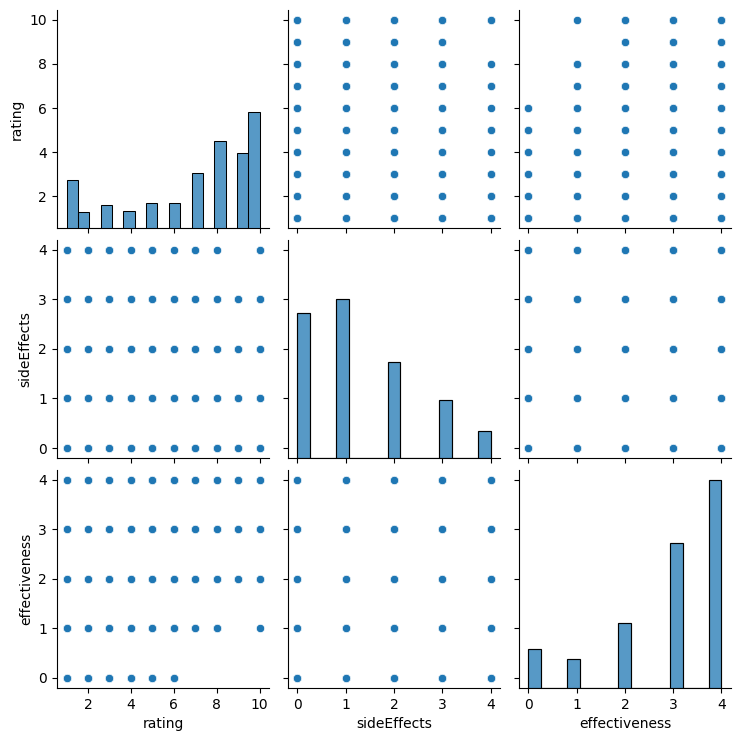

In [100]:
sns.pairplot(X)

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [101]:
from sklearn.cluster import KMeans

In [103]:
ks = []
inertias = []

for k in range(1, 10):
    clustering = KMeans(n_clusters = k)
    clustering.fit(X)
    inertias.append(clustering.inertia_)
    ks.append(k)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

In [105]:
df_inertias = pd.DataFrame({'k': ks, 'inertia': inertias})
df_inertias

,k,inertia
0,1,35812.368201
1,2,11137.736724
2,3,7254.022835
3,4,5691.624714
4,5,4799.917418
5,6,4311.614329
6,7,3836.585548
7,8,3404.724438
8,9,3058.946572


In [107]:
df_inertias['diff'] = df_inertias['inertia'] - df_inertias['inertia'].shift(1)
df_inertias

,k,inertia,diff
0,1,35812.368201,NaN
1,2,11137.736724,-24674.631477
2,3,7254.022835,-3883.713888
3,4,5691.624714,-1562.398121
4,5,4799.917418,-891.707296
5,6,4311.614329,-488.303090
6,7,3836.585548,-475.028781
7,8,3404.724438,-431.861110
8,9,3058.946572,-345.777866


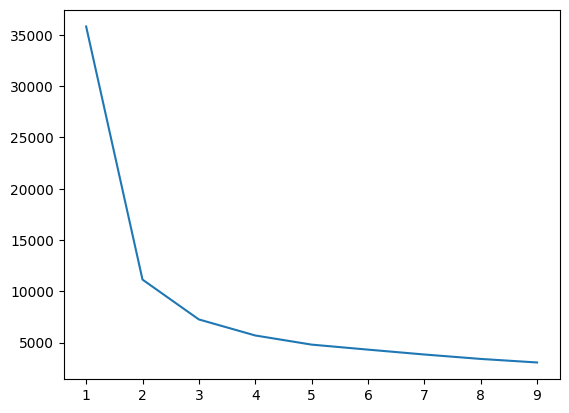

In [109]:
plt.plot(ks, inertias);

In [110]:
from sklearn.metrics import silhouette_score

In [113]:
clustering.labels_

array([7, 1, 0, ..., 3, 6, 7])

In [115]:
ks = []
sil_scores = []

for k in range(2, 10):
    clustering = KMeans(n_clusters = k)
    clustering.fit(X)

    sil_scores.append(silhouette_score(X, clustering.labels_))
    ks.append(k)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

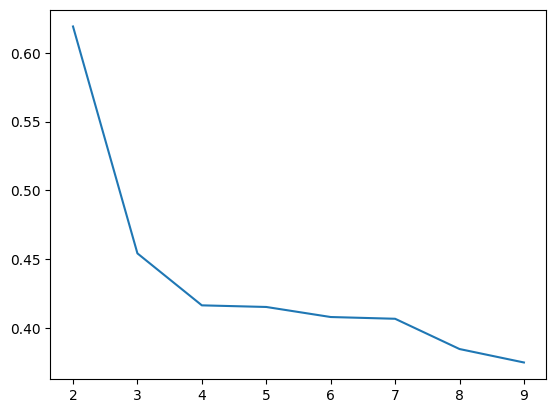

In [117]:
plt.plot(ks, sil_scores)

#### Genera el K Means 

In [119]:
clustering_k2 = KMeans(n_clusters= 2)
clustering_k2.fit(X)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [121]:
X['cluster'] = clustering_k2.predict(X)

C:\Users\misla\AppData\Local\Temp\ipykernel_16740\1639477851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = clustering_k2.predict(X)


In [122]:
X

,rating,sideEffects,effectiveness,cluster
0,4,1,4,1
1,1,3,4,1
2,10,0,4,0
3,3,1,1,1
4,2,3,1,1
...,...,...,...,...
3102,10,1,4,0
3103,1,4,0,1
3104,2,2,1,1
3105,8,1,3,0


In [125]:
X['cluster'].value_counts(normalize= True)

0    0.735114
1    0.264886
Name: cluster, dtype: float64

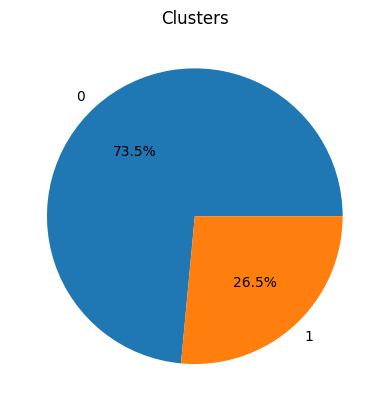

In [136]:
plt.pie(X['cluster'].value_counts(normalize= True), autopct= '%1.1f%%', labels= ['0', '1'])
plt.title('Clusters');

In [138]:
X.groupby('cluster').describe()

rating                                                sideEffects  \
          count      mean       std  min  25%  50%   75%   max       count   
cluster                                                                      
0        2284.0  8.569615  1.272701  5.0  8.0  9.0  10.0  10.0      2284.0   
1         823.0  2.667072  1.570244  1.0  1.0  3.0   4.0   6.0       823.0   

                   ...           effectiveness                                \
             mean  ...  75%  max         count      mean       std  min  25%   
cluster            ...                                                         
0        0.880473  ...  1.0  4.0        2284.0  3.422504  0.708896  1.0  3.0   
1        2.482382  ...  3.0  4.0         823.0  1.584447  1.356197  0.0  0.0   

                        
         50%  75%  max  
cluster                 
0        4.0  4.0  4.0  
1        1.0  3.0  4.0  

[2 rows x 24 columns]

In [141]:
cluster_map = {0: 'Good', 1: 'Bad'}

In [143]:
X['Label'] = X['cluster'].map(cluster_map)

C:\Users\misla\AppData\Local\Temp\ipykernel_16740\93010412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Label'] = X['cluster'].map(cluster_map)


c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


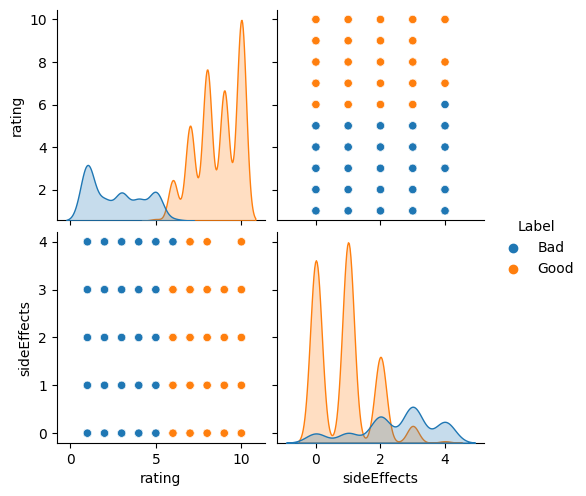

In [146]:
sns.pairplot(data= X[['rating', 'sideEffects', 'Label']], hue= 'Label')

In [ ]:
# df_final['rating'] = np.where(df_final['class'] == 0, df_final['rating'] - 5, df_final['rating'])
# x = df_final['rating']
# y = df_final['effectiveness']
# z = df_final['sideEffects']

# import plotly.express as px
# fig = px.scatter_3d(df_final, x=x, y=y, z=z, range_x = (-5, 12), range_y = (0, 5), range_z= (0, 5),
#               color='class')
# fig.show()